In [1]:
#2D 포즈 데이터 로드 및 구조 확인
# AIST++의 2D 포즈 데이터가 어떤 형태로 저장되어 있는지 이해하기 위한 탐색용 코드야. 
# 이후 포즈 시각화나 특징 추출의 기반이 되는 구조 분석
import os
import pickle

# pkl 파일 경로 설정
base_path = r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints2d"

# 디렉토리 내 pkl 파일 리스트 가져오기
pkl_files = [f for f in os.listdir(base_path) if f.endswith('.pkl')]
print(f"총 {len(pkl_files)}개의 pkl 파일이 있습니다.")

# 첫 번째 파일 열어서 확인
sample_path = os.path.join(base_path, pkl_files[0])

with open(sample_path, 'rb') as f:
    data = pickle.load(f)

# 키 확인
print(f"\n파일 이름: {pkl_files[0]}")
print("데이터의 key 목록:")
print(data.keys())

# 각 key의 데이터 타입과 shape 확인
for key in data:
    value = data[key]
    if hasattr(value, 'shape'):
        print(f"{key} → 타입: {type(value)}, shape: {value.shape}")
    else:
        print(f"{key} → 타입: {type(value)}, 내용 예시: {str(value)[:100]}")


총 1510개의 pkl 파일이 있습니다.

파일 이름: gBR_sBM_cAll_d04_mBR0_ch01.pkl
데이터의 key 목록:
dict_keys(['keypoints2d', 'det_scores', 'timestamps'])
keypoints2d → 타입: <class 'numpy.ndarray'>, shape: (9, 720, 17, 3)
det_scores → 타입: <class 'numpy.ndarray'>, shape: (9, 720)
timestamps → 타입: <class 'numpy.ndarray'>, shape: (720,)


In [3]:
#3D 포즈 데이터 로드 및 구조 확인

import os
import pickle

path_3d = r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d"

# pkl 파일 목록 확인
pkl_files = [f for f in os.listdir(path_3d) if f.endswith('.pkl')]
print(f"총 {len(pkl_files)}개의 3D pkl 파일이 있습니다.")

# 첫 번째 파일 확인
sample_file = os.path.join(path_3d, pkl_files[0])
with open(sample_file, 'rb') as f:
    data_3d = pickle.load(f)

# key, shape 확인
print("키 목록:", data_3d.keys())
for k in data_3d:
    v = data_3d[k]
    if hasattr(v, 'shape'):
        print(f"{k} → shape: {v.shape}")
    else:
        print(f"{k} → type: {type(v)}, 예시: {str(v)[:100]}")


총 1408개의 3D pkl 파일이 있습니다.
키 목록: dict_keys(['keypoints3d', 'keypoints3d_optim'])
keypoints3d → shape: (720, 17, 3)
keypoints3d_optim → shape: (720, 17, 3)


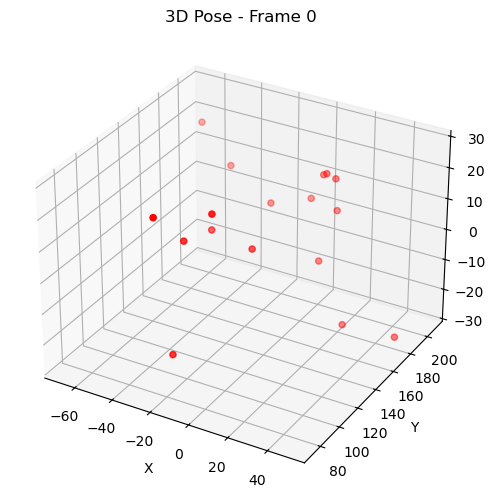

In [5]:
#3D 포즈 데이터 시각화
# keypoints3d에서 첫 번째 프레임을 시각화함.
# 각 관절의 3차원 좌표 (x, y, z)를 scatter로 표시.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pose3d = data_3d['keypoints3d']  # (frame, joint, xyz)
frame_idx = 0  # 첫 프레임만 시각화

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

x = pose3d[frame_idx, :, 0]
y = pose3d[frame_idx, :, 1]
z = pose3d[frame_idx, :, 2]

ax.scatter(x, y, z, c='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Pose - Frame 0')
plt.show()


In [7]:
# 모션 데이터 로드 및 구조 확인
# motions 폴더는 일반적으로 포즈가 아니라 모션 파라미터 (예: SMPL 모델의 pose, shape, translation 등)를 담고 있음
import os
import pickle

motions_path = r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\motions"

# 파일 리스트 확인
motion_files = [f for f in os.listdir(motions_path) if f.endswith('.pkl')]
print(f"총 {len(motion_files)}개의 motion pkl 파일이 있습니다.")

# 첫 번째 파일 열어보기
sample_motion_path = os.path.join(motions_path, motion_files[0])
with open(sample_motion_path, 'rb') as f:
    motion_data = pickle.load(f)

# 키와 데이터 구조 확인
print("키 목록:", motion_data.keys())
for k in motion_data:
    v = motion_data[k]
    if hasattr(v, 'shape'):
        print(f"{k} → shape: {v.shape}")
    else:
        print(f"{k} → type: {type(v)}, 예시: {str(v)[:100]}")


총 1408개의 motion pkl 파일이 있습니다.
키 목록: dict_keys(['smpl_loss', 'smpl_poses', 'smpl_scaling', 'smpl_trans'])
smpl_loss → type: <class 'float'>, 예시: 1.5907235145568848
smpl_poses → shape: (720, 72)
smpl_scaling → shape: (1,)
smpl_trans → shape: (720, 3)


In [3]:
# 메타데이터 생성 - 파일명 기반 정보 추출 및 CSV 저장
# keypoints3d 파일명을 _로 분리해서 각각의 정보 추출: 장르, 스타일, 카메라, 댄스ID, 댄서, 채널
# 코드명을 실제 장르명으로 변환 (예: gBR → Breakdance).
#이 정보를 기반으로 motion_metadata.csv 파일을 생성.

import os
import pandas as pd

# 폴더 경로 설정
folder_path = r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d"

# 파일명 목록
file_list = [f for f in os.listdir(folder_path) if f.endswith(".pkl")]

# 장르 매핑 테이블
genre_map = {
    'gBR': 'Breakdance',
    'gPO': 'Pop',
    'gLO': 'Lock',
    'gWA': 'Waack',
    'gHO': 'House',
    'gKR': 'Krump',
    'gJS': 'Jazz',
    'gLH': 'LA_Hiphop',
    'gMH': 'Middle_Hiphop',
    'gJB' : 'Ballet_Jazz'
}

# 결과 리스트
results = []

# 파일명 파싱
for filename in file_list:
    name = filename.replace(".pkl", "")
    parts = name.split('_')

    genre_code = parts[0]
    style = parts[1]
    camera = parts[2]
    dance_id = parts[3]
    dancer = parts[4]
    channel = parts[5]

    genre = genre_map.get(genre_code, "Unknown")

    results.append({
        "MOTION_ID": name,
        "GENRE_CODE": genre_code,
        "GENRE_NAME": genre,
        "STYLE": style,
        "CAMERA": camera,
        "DANCE_ID": dance_id,
        "DANCER": dancer,
        "CHANNEL": channel
    })

# 데이터프레임으로 변환
df = pd.DataFrame(results)

# 저장하기
df.to_csv("motion_metadata.csv", index=False, encoding="utf-8-sig")
print("motion_metadata.csv 파일로 저장 완료!")


motion_metadata.csv 파일로 저장 완료!


In [5]:
import os
os.getcwd()

'C:\\Users\\SongYoengEun\\Desktop\\cap'

In [1]:
# 감정-모션 관계 DB 테이블 생성 및 저장
# Motion_Metadata_with_Emotions.csv에서 EMOTION_1, EMOTION_2 컬럼을 추출해서 고유 감정 리스트를 만들고, 
# 이를 기반으로 다음과 같은 테이블들을 생성함

import pandas as pd

# 기존 감정이 매핑된 motion metadata 파일 불러오기
df = pd.read_csv("Motion_Metadata_with_Emotions.csv")

# EMOTION 테이블을 만들기 위한 고유 감정 목록 추출
unique_emotions = pd.unique(df[['EMOTION_1', 'EMOTION_2']].values.ravel())
unique_emotions = [e for e in unique_emotions if pd.notna(e)]

# EMOTION 테이블 생성
emotion_df = pd.DataFrame({
    "ID": range(1, len(unique_emotions)+1),
    "NAME": unique_emotions
})

# 감정명 → ID 매핑 딕셔너리
emotion_to_id = dict(zip(emotion_df["NAME"], emotion_df["ID"]))

# MOTION 테이블 생성
motion_df = df[["MOTION_ID"]].copy()
motion_df["ID"] = range(1, len(motion_df)+1)

# motion_id → ID 매핑
motion_to_id = dict(zip(motion_df["MOTION_ID"], motion_df["ID"]))

# EMOTION_MOTION 테이블 생성
emotion_motion_records = []
for _, row in df.iterrows():
    motion_id = motion_to_id[row["MOTION_ID"]]
    for emotion in [row["EMOTION_1"], row["EMOTION_2"]]:
        if pd.notna(emotion):
            emotion_id = emotion_to_id[emotion]
            emotion_motion_records.append({
                "ID": len(emotion_motion_records) + 1,
                "EMOTION_ID": emotion_id,
                "MOTION_ID": motion_id
            })

emotion_motion_df = pd.DataFrame(emotion_motion_records)

# 저장
emotion_df.to_csv(r"C:\Users\SongYoengEun\Desktop\cap\emotion_table.csv", index=False, encoding="utf-8-sig")
motion_df.to_csv(r"C:\Users\SongYoengEun\Desktop\cap\motion_table.csv", index=False, encoding="utf-8-sig")
emotion_motion_df.to_csv(r"C:\Users\SongYoengEun\Desktop\cap\emotion_motion_table.csv", index=False, encoding="utf-8-sig")


In [3]:
# 감정 기반 안무 추천 함수 구현
# 특정 감정을 입력하면 해당 감정에 연결된 모션 중 num_results 개수를 무작위로 추천해주는 함수.
# 감정 이름 → ID 매핑, ID 기반으로 연결된 모션 찾기, 랜덤 추출 후 모션 이름 반환.

import pandas as pd
import random

emotion_path = r"C:\Users\SongYoengEun\Desktop\cap\emotion_table.csv"
motion_path = r"C:\Users\SongYoengEun\Desktop\cap\motion_table.csv"
mapping_path = r"C:\Users\SongYoengEun\Desktop\cap\emotion_motion_table.csv"

# CSV 불러오기
emotion_df = pd.read_csv(emotion_path)
motion_df = pd.read_csv(motion_path)
mapping_df = pd.read_csv(mapping_path)

# 감정 이름 → 감정 ID 매핑
emotion_name_to_id = dict(zip(emotion_df["NAME"], emotion_df["ID"]))

# 추천 함수 정의
def recommend_motions_by_emotion(emotion_name, num_results=5):
    emotion_id = emotion_name_to_id.get(emotion_name)
    if not emotion_id:
        return f"감정 '{emotion_name}'은(는) 존재하지 않아요!"

    # 매핑 테이블에서 해당 감정에 연결된 모션 ID들
    motion_ids = mapping_df[mapping_df["EMOTION_ID"] == emotion_id]["MOTION_ID"].tolist()
    if not motion_ids:
        return f"'{emotion_name}'에 해당하는 안무가 없어요."

    # 무작위 추천
    recommended_ids = random.sample(motion_ids, min(num_results, len(motion_ids)))
    recommendations = motion_df[motion_df["ID"].isin(recommended_ids)]["MOTION_ID"].tolist()

    return recommendations

# 예시 실행: 감정 '자신감'에 해당하는 추천 5개
recommend_motions_by_emotion("자신감")


"감정 '자신감'은(는) 존재하지 않아요!"

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'aist_pose_animation.mp4',
 'dance_emotion_labeling.ipynb',
 'dataset',
 'emotion_motion_table.csv',
 'emotion_table.csv',
 'gHO_skeleton_animation.mp4',
 'motion_metadata.csv',
 'Motion_Metadata_with_Emotions.csv',
 'motion_table.csv',
 'skeleton_colored.mp4',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 '~$emotion_motion_table.csv',
 '~$emotion_table.csv',
 '~$motion_table.csv']

In [13]:
import os
os.listdir("dataset")

['aist_plusplus_final']

In [8]:
# 3D 포즈 기반 감정 특성 추출
# 특정 .pkl 파일의 3D 포즈(keypoints3d_optim)를 불러와 다음과 같은 4가지 지표를 계산:
# 평균 팔 높이, 움직임 속도, pelvis의 이동량, 관절 간 거리의 분산 평균(퍼짐도)
# 각 지표에 임계값을 두고 해당 값을 넘으면 감정 태그를 붙임.

import pickle
import numpy as np

# 나의 .pkl 파일 경로
pkl_path = r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d\gHO_sBM_cAll_d19_mHO0_ch01.pkl"

# 데이터 불러오기
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

pose3d = data["keypoints3d_optim"]  # shape: (720, 17, 3)

# 관절 인덱스
left_arm = [5, 6, 7]
right_arm = [2, 3, 4]
pelvis = 8

# 1. 평균 팔 높이
avg_arm_height = (pose3d[:, left_arm, 1].mean() + pose3d[:, right_arm, 1].mean()) / 2

# 2. 프레임 간 움직임 속도
speed = np.linalg.norm(np.diff(pose3d, axis=0), axis=2).mean()

# 3. 중심 이동량 (pelvis 기준)
pelvis_shift = np.linalg.norm(np.diff(pose3d[:, pelvis, :], axis=0), axis=1).mean()

# 4. 퍼짐도 (관절 간 거리의 표준편차 평균)
spread = []
for frame in pose3d:
    dists = [np.linalg.norm(frame[i] - frame[j]) for i in range(17) for j in range(i+1, 17)]
    spread.append(np.std(dists))
avg_spread = np.mean(spread)

# 감정 추정
emotion_tags = []
if avg_arm_height > 140: emotion_tags.append("자신감")
if speed > 20: emotion_tags.append("에너지")
if pelvis_shift > 10: emotion_tags.append("역동성")
if avg_spread > 150: emotion_tags.append("자유")

# 결과
print("팔 높이:", avg_arm_height)
print("속도:", speed)
print("중심 이동량:", pelvis_shift)
print("퍼짐도:", avg_spread)
print("예상 감정:", emotion_tags)


팔 높이: 180.34417968964166
속도: 0.9227526226080078
중심 이동량: 1.2918373139360713
퍼짐도: 29.747346457971158
예상 감정: ['자신감']


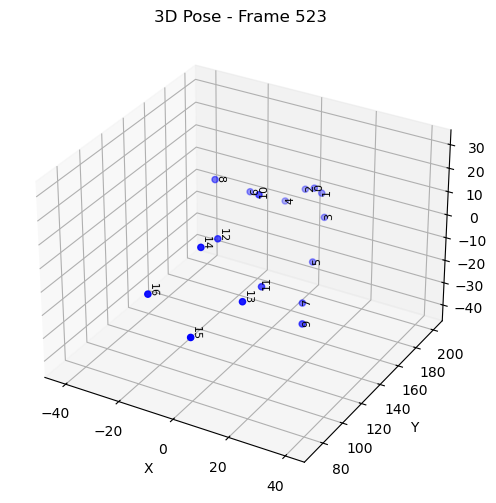

In [24]:
# 3D 포즈 애니메이션 생성 및 저장 (점만 표시)
# .pkl에서 3D 포즈 시퀀스를 불러와 scatter plot으로 매 프레임을 그리며 애니메이션으로 저장.
# ax.scatter를 써서 관절 점만 찍는 방식임. set_3d_properties, set_position 등으로 관절 번호도 함께 출력.

# 필요한 라이브러리
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter
import numpy as np

# 1. 피클 파일 로드
with open(r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d\gHO_sBM_cAll_d19_mHO0_ch01.pkl", "rb") as f:
    data = pickle.load(f)

keypoints3d = data["keypoints3d"]  # (num_frames, num_joints, 3)

# 2. 그래프 설정
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter([], [], [], c='blue')
txts = [ax.text(0, 0, 0, '', size=8) for _ in range(keypoints3d.shape[1])]

def init():
    ax.set_xlim([np.min(keypoints3d[:, :, 0]) - 10, np.max(keypoints3d[:, :, 0]) + 10])
    ax.set_ylim([np.min(keypoints3d[:, :, 1]) - 10, np.max(keypoints3d[:, :, 1]) + 10])
    ax.set_zlim([np.min(keypoints3d[:, :, 2]) - 10, np.max(keypoints3d[:, :, 2]) + 10])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return sc, *txts

def update(frame):
    pose = keypoints3d[frame]
    sc._offsets3d = (pose[:, 0], pose[:, 1], pose[:, 2])
    for i, (x, y, z) in enumerate(pose):
        txts[i].set_position((x, y))
        txts[i].set_3d_properties(z)
        txts[i].set_text(str(i))
    ax.set_title(f"3D Pose - Frame {frame}")
    return sc, *txts

# 3. 애니메이션 생성 및 저장
ani = FuncAnimation(fig, update, frames=len(keypoints3d), init_func=init, interval=50)
ani.save("aist_pose_animation.mp4", writer=FFMpegWriter(fps=20))


In [25]:
# 생성된 애니메이션 파일 용량 확인

import os

file_path = "aist_pose_animation.mp4"
print("파일 크기 (MB):", os.path.getsize(file_path) / (1024 * 1024))

파일 크기 (MB): 0.5117063522338867


✅ 영상 저장 완료!


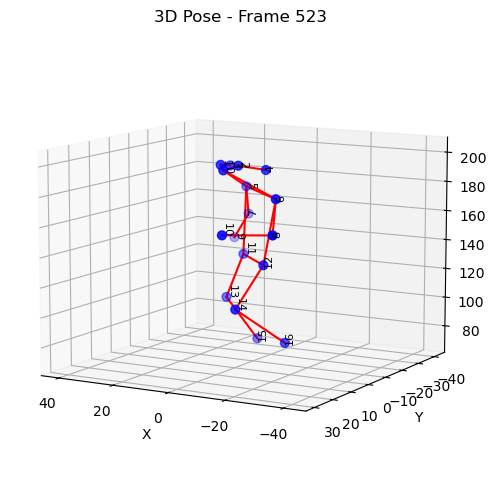

In [41]:
# 3D 포즈 애니메이션 생성 및 저장 (관절 연결선 포함)
# 관절 점들 간의 연결 관계를 edges 리스트로 정의하여 스켈레톤 형태의 3D 애니메이션을 생성.
# scatter뿐 아니라 plot으로 관절 간 선도 함께 그림.
# 저장된 파일은 gHO_skeleton_animation.mp4.

import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

# 1. 피클 파일 로드
with open(r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d\gHO_sBM_cAll_d19_mHO0_ch01.pkl", "rb") as f:
    data = pickle.load(f)

keypoints3d = data["keypoints3d_optim"]  # 또는 "keypoints3d"
keypoints3d = keypoints3d.copy()
keypoints3d[:, :, [1, 2]] = keypoints3d[:, :, [2, 1]]  # Z↔Y 변환

# 2. 연결할 관절
edges = [
    (5, 7), (7, 9),    # Left arm
    (6, 8), (8,10),    # Right arm
    (11,13), (13,15),  # Left leg
    (12,14), (14,16),  # Right leg
    (5, 6),            # Shoulders
    (11,12),           # Hips
    (5,11), (6,12),    # Torso sides
    (0,1), (0,2),      # Nose to Eyes
    (1,3), (2,4),      # Eyes to Ears
    (0,5), (0,6)       # Nose to Shoulders
]



# 3. 시각화 설정
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter([], [], [], c='blue', s=40)
lines = [ax.plot([], [], [], c='red')[0] for _ in edges]
txts = [ax.text(0, 0, 0, '', fontsize=8) for _ in range(17)]

# 4. 초기화 함수
def init():
    ax.set_xlim(np.min(keypoints3d[:, :, 0])-10, np.max(keypoints3d[:, :, 0])+10)
    ax.set_ylim(np.min(keypoints3d[:, :, 1])-10, np.max(keypoints3d[:, :, 1])+10)
    ax.set_zlim(np.min(keypoints3d[:, :, 2])-10, np.max(keypoints3d[:, :, 2])+10)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=10, azim=120)
    return sc, *lines, *txts

# 5. 프레임 업데이트 함수
def update(frame):
    pose = keypoints3d[frame]
    if np.all(pose == 0) or np.isnan(pose).any():
        return sc, *lines, *txts

    sc._offsets3d = (pose[:, 0], pose[:, 1], pose[:, 2])

    for i, txt in enumerate(txts):
        txt.set_position((pose[i, 0], pose[i, 1]))
        txt.set_3d_properties(pose[i, 2])
        txt.set_text(str(i))

    for i, (start, end) in enumerate(edges):
        xs = [pose[start, 0], pose[end, 0]]
        ys = [pose[start, 1], pose[end, 1]]
        zs = [pose[start, 2], pose[end, 2]]
        lines[i].set_data(xs, ys)
        lines[i].set_3d_properties(zs)

    ax.set_title(f"3D Pose - Frame {frame}")
    return sc, *lines, *txts

# 6. 애니메이션 저장
ani = FuncAnimation(fig, update, frames=len(keypoints3d), init_func=init, interval=50)
ani.save("gHO_skeleton_animation.mp4", writer=FFMpegWriter(fps=20))
print("✅ 영상 저장 완료!")


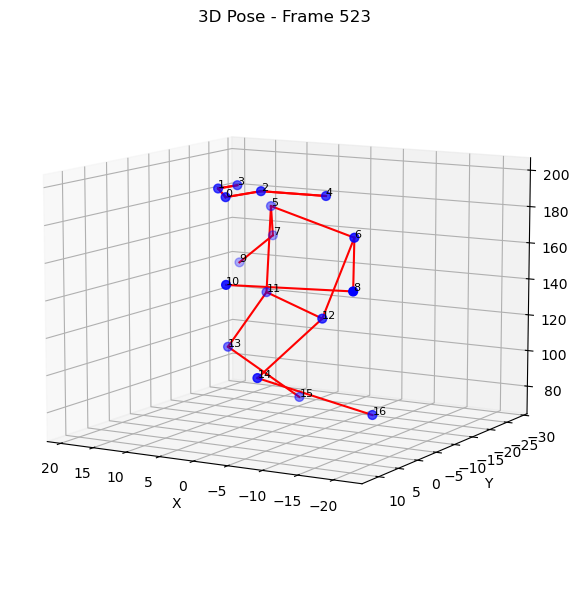

In [57]:
# 단일 프레임 3D 포즈 시각화 + 관절 연결
# 애니메이션 없이 단일 포즈만 보려는 목적.

import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 피클 파일 로드
with open(r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d\gHO_sBM_cAll_d19_mHO0_ch01.pkl", "rb") as f:
    data = pickle.load(f)

keypoints3d = data["keypoints3d_optim"].copy()
keypoints3d[:, :, [1, 2]] = keypoints3d[:, :, [2, 1]]  # Z↔Y 변환

# 시각화할 프레임
frame = 523
pose = keypoints3d[frame]

# 2. 관절 연결 정보
edges = [
    (5, 7), (7, 9),    # Left arm
    (6, 8), (8,10),    # Right arm
    (11,13), (13,15),  # Left leg
    (12,14), (14,16),  # Right leg
    (5, 6),            # Shoulders
    (11,12),           # Hips
    (5,11), (6,12),    # Torso sides
    (0,1), (0,2),      # Nose to Eyes
    (1,3), (2,4),      # Eyes to Ears
    (3, 1), (1, 0), (0, 2), (2, 4)
]

# 3. 시각화
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"3D Pose - Frame {frame}")
ax.scatter(pose[:, 0], pose[:, 1], pose[:, 2], c='blue', s=40)

# 관절 텍스트
for i, (x, y, z) in enumerate(pose):
    ax.text(x, y, z, str(i), fontsize=8)

# 관절 연결
for start, end in edges:
    xs = [pose[start, 0], pose[end, 0]]
    ys = [pose[start, 1], pose[end, 1]]
    zs = [pose[start, 2], pose[end, 2]]
    ax.plot(xs, ys, zs, c='red')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=10, azim=120)
plt.tight_layout()
plt.show()


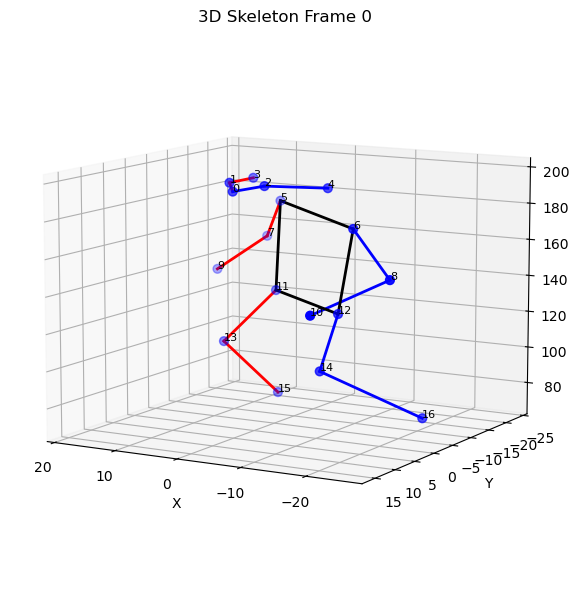

In [61]:
# 프레임 0 기준 좌우/중심 스켈레톤 구분 시각화

import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Load data
with open(r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d\gHO_sBM_cAll_d19_mHO0_ch01.pkl", "rb") as f:
    data = pickle.load(f)

keypoints3d = data["keypoints3d_optim"]
keypoints3d = keypoints3d.copy()
keypoints3d[:, :, [1, 2]] = keypoints3d[:, :, [2, 1]]  # Z↔Y swap

# 2. Pick a frame
frame = 0
pose = keypoints3d[frame]
if np.all(pose == 0) or np.isnan(pose).any():
    print("Invalid frame.")
    exit()

# 3. Define edges by category
edges_left = [(5, 7), (7, 9), (11,13), (13,15), (0,1), (1,3)]      # left: red
edges_right = [(6, 8), (8,10), (12,14), (14,16), (0,2), (2,4)]     # right: blue
edges_center = [(5,6), (11,12), (5,11), (6,12)]      # center: black

# 4. Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Skeleton Frame 0")

# Draw joints
ax.scatter(pose[:, 0], pose[:, 1], pose[:, 2], c='blue', s=40)

# Draw bones
for start, end in edges_left:
    ax.plot([pose[start,0], pose[end,0]],
            [pose[start,1], pose[end,1]],
            [pose[start,2], pose[end,2]], c='red', linewidth=2)

for start, end in edges_right:
    ax.plot([pose[start,0], pose[end,0]],
            [pose[start,1], pose[end,1]],
            [pose[start,2], pose[end,2]], c='blue', linewidth=2)

for start, end in edges_center:
    ax.plot([pose[start,0], pose[end,0]],
            [pose[start,1], pose[end,1]],
            [pose[start,2], pose[end,2]], c='black', linewidth=2)

# Annotate joint indices
for i, (x, y, z) in enumerate(pose):
    ax.text(x, y, z, str(i), fontsize=8)

# Axes settings
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=10, azim=120)
plt.tight_layout()
plt.show()


C:\Users\SongYoengEun\anaconda3\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


✅ 저장 완료: skeleton_colored.mp4


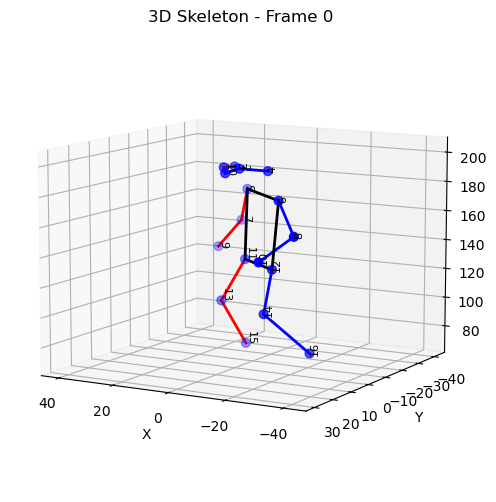

In [63]:
# 색상 구분 포함 3D 애니메이션 저장

import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

# 1. Load data
with open(r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d\gHO_sBM_cAll_d19_mHO0_ch01.pkl", "rb") as f:
    data = pickle.load(f)

keypoints3d = data["keypoints3d_optim"].copy()
keypoints3d[:, :, [1, 2]] = keypoints3d[:, :, [2, 1]]  # Z↔Y swap

# 2. Define edges by category
edges_left = [(5, 7), (7, 9), (11,13), (13,15), (0,1), (1,3)]      # red
edges_right = [(6, 8), (8,10), (12,14), (14,16), (0,2), (2,4)]     # blue
edges_center = [(5,6), (11,12), (5,11), (6,12)]                    # black

# 3. Plot setup
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=10, azim=120)

# Set consistent axis limits for animation
x_min, x_max = np.min(keypoints3d[:,:,0])-10, np.max(keypoints3d[:,:,0])+10
y_min, y_max = np.min(keypoints3d[:,:,1])-10, np.max(keypoints3d[:,:,1])+10
z_min, z_max = np.min(keypoints3d[:,:,2])-10, np.max(keypoints3d[:,:,2])+10
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# Scatter for joints
sc = ax.scatter([], [], [], c='blue', s=40)
txts = [ax.text(0, 0, 0, '', fontsize=8) for _ in range(17)]

# Line collections
lines_left = [ax.plot([], [], [], c='red', lw=2)[0] for _ in edges_left]
lines_right = [ax.plot([], [], [], c='blue', lw=2)[0] for _ in edges_right]
lines_center = [ax.plot([], [], [], c='black', lw=2)[0] for _ in edges_center]

# 4. Update function
def update(frame):
    pose = keypoints3d[frame]
    if np.all(pose == 0) or np.isnan(pose).any():
        return []

    sc._offsets3d = (pose[:, 0], pose[:, 1], pose[:, 2])

    for i, (x, y, z) in enumerate(pose):
        txts[i].set_position((x, y))
        txts[i].set_3d_properties(z)
        txts[i].set_text(str(i))

    for line, (start, end) in zip(lines_left, edges_left):
        line.set_data([pose[start,0], pose[end,0]],
                      [pose[start,1], pose[end,1]])
        line.set_3d_properties([pose[start,2], pose[end,2]])

    for line, (start, end) in zip(lines_right, edges_right):
        line.set_data([pose[start,0], pose[end,0]],
                      [pose[start,1], pose[end,1]])
        line.set_3d_properties([pose[start,2], pose[end,2]])

    for line, (start, end) in zip(lines_center, edges_center):
        line.set_data([pose[start,0], pose[end,0]],
                      [pose[start,1], pose[end,1]])
        line.set_3d_properties([pose[start,2], pose[end,2]])

    ax.set_title(f"3D Skeleton - Frame {frame}")
    return [sc, *lines_left, *lines_right, *lines_center, *txts]

# 5. Run and save animation
ani = FuncAnimation(fig, update, frames=len(keypoints3d), interval=50, blit=False)
ani.save("skeleton_colored.mp4", writer=FFMpegWriter(fps=20))
print("저장 완료: skeleton_colored.mp4")


In [11]:
# 감정 추정 (에너지 계산 방식 개선) 미완

import pickle
import numpy as np

# 🔹 너의 .pkl 파일 경로
pkl_path = r"C:\Users\SongYoengEun\Desktop\cap\dataset\aist_plusplus_final\keypoints3d\gHO_sBM_cAll_d19_mHO0_ch01.pkl"

# 🔹 데이터 불러오기
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

pose3d = data["keypoints3d_optim"]  # shape: (720, 17, 3)

# 🔹 관절 인덱스
left_arm = [5, 7, 9]
right_arm = [6, 8, 10]
pelvis = [11, 12]
pelvis_center = pose3d[:, pelvis, :].mean(axis=1)

# 🔹 1. 평균 팔 높이
avg_arm_height = (pose3d[:, left_arm, 1].mean() + pose3d[:, right_arm, 1].mean()) / 2

# 🔹 2. 프레임 간 관절 평균 변화율이 큰 프레임 비율 기반 "에너지" 계산

# 프레임 간 변화량 (720, 17, 3) → (719, 17)
frame_diffs = np.linalg.norm(np.diff(pose3d, axis=0), axis=2)  # 각 프레임마다 17개 관절의 이동량

# 각 프레임에서 관절 변화량 평균 계산
frame_energy = frame_diffs.mean(axis=1)  # shape: (719,)

# 변화량 평균이 threshold 이상인 프레임 비율 계산
threshold = 1.0  # 움직임이 크다고 판단할 기준 (직접 조정 가능)
high_energy_ratio = np.sum(frame_energy > threshold) / len(frame_energy)

# 예: 30% 이상 프레임이 크게 움직이면 에너지 태그
if high_energy_ratio > 0.3:
    emotion_tags.append("에너지")

# 디버깅용 출력
print(f"에너지 프레임 비율: {high_energy_ratio:.2%}")


# 🔹 3. 중심 이동량 (pelvis 기준)
pelvis_shift = np.linalg.norm(np.diff(pose3d[:, pelvis, :], axis=0), axis=1).mean()

# 🔹 4. 퍼짐도 (관절 간 거리의 표준편차 평균)
spread = []
for frame in pose3d:
    dists = [np.linalg.norm(frame[i] - frame[j]) for i in range(17) for j in range(i+1, 17)]
    spread.append(np.std(dists))
avg_spread = np.mean(spread)

# 🔹 감정 추정
emotion_tags = []
if avg_arm_height > 140: emotion_tags.append("자신감")
#if speed > 20: emotion_tags.append("에너지")
if pelvis_shift > 10: emotion_tags.append("역동성")
if avg_spread > 150: emotion_tags.append("자유")

# 🔹 결과
print("팔 높이:", avg_arm_height)
#print("속도:", speed)
print("중심 이동량:", pelvis_shift)
print("퍼짐도:", avg_spread)
print("예상 감정:", emotion_tags)

에너지 프레임 비율: 34.03%
팔 높이: 157.59565284354153
중심 이동량: 0.500628990611837
퍼짐도: 29.747346457971158
예상 감정: ['자신감']
